<table style="border:2px solid white;" cellspacing="0" cellpadding="0" border-collapse: collapse; border-spacing: 0;>
  <tr> 
    <th style="background-color:white"> <img src="../media/ccal-logo-D3.png" width=225 height=225></th>
    <th style="background-color:white"> <img src="../media/logoMoores.jpg" width=175 height=175></th>
    <th style="background-color:white"> <img src="../media/GP.png" width=200 height=200></th>
    <th style="background-color:white"> <img src="../media/UCSD_School_of_Medicine_logo.png" width=175 height=175></th> 
    <th style="background-color:white"> <img src="../media/Broad.png" width=130 height=130></th> 
  </tr>
</table>

**Part 2 of building a PlatiRes Map**   
Daniela Nachmanson *Fall 2017*

Using the Chapter 2 of the **Onco-*GPS* notebooks** in order to do NMF with a platinum phenotype derived gene list.
The genelist used in this NMF is derived from bulkRNA seq experiment done in Professor Harismendy's as well as an experiment performed in Marchion et al experiment.

<hr style="border: none; border-bottom: 3px solid #88BBEE;">
# **Onco-*GPS* Methodology**
## **Chapter 2. Decomposing Signature and Defining Transcriptional Components**

**Authors:** William Kim$^{1}$, Huwate (Kwat) Yeerna$^{2}$, Taylor Cavazos$^{2}$, Kate Medetgul-Ernar$^{2}$, Clarence Mah$^{3}$, Stephanie Ting$^{2}$, Jason Park$^{2}$, Jill P. Mesirov$^{2, 3}$ and Pablo Tamayo$^{2,3}$.

**Date:** April 17, 2017

1. Eli and Edythe Broad Institute      
2. UCSD Moores Cancer Center
3. UCSD School of Medicine 

**Article:** [*Kim et al.* Decomposing Oncogenic Transcriptional Signatures to Generate Maps of Divergent Cellular States](https://drive.google.com/file/d/0B0MQqMWLrsA4b2RUTTAzNjFmVkk/view?usp=sharing)

**Analysis overview:** In this chapter we will use the platinum phenotype related genes that we generated in part 1 and we will decompose them into non-negative matrix factorization components.

<img src="../media/method_chap2.png" width=2144 height=1041>

To perform this analysis we will use as reference dataset 750 samples from the Broad-Novartis Cancer Cell Line Encyclopedia (CCLE) ([*Barretina et al. 2012*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3320027/)). This dataset, hereafter denoted as $A^{n \times m}$, contains as rows the oncogenic signature genes and  samples representing many instances of the cellular states of interest. 

The decomposition is based on a Non-Negative Matrix Factorization (NMF) algorithm ([*Brunet et al. 2004*](https://www.ncbi.nlm.nih.gov/pubmed/15016911); [*Tamayo et al. 2007*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1838404/)). These transcriptional components represent summaries of the most coherent gene expression patterns, relevant to the platinum resistance genes across the wide variety of cellular states and contexts represented in the reference dataset. The methodology contains the following analysis tasks:


*	*Normalization*. Normalize the input matrix $A^{n \times m}$ by replacing each gene expression entry by its column rank and obtain matrix $A^{n \times m}_{norm}$.


*	*Matrix Factorization.* Perform a standard non-negative matrix factorization (NMF) ([*Brunet et al. 2004*](https://www.ncbi.nlm.nih.gov/pubmed/15016911); [*Tamayo et al. 2007*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1838404/), [*Cichocki et al. 2008*](http://www.bsp.brain.riken.jp/publications/2007/Cichocki-Zd-Amar_SPMAG.pdf)) $$A^{n \times m}_{norm} \sim W^{n \times k} \times H^{k \times m}$$ where the resulting matrices $W^{n \times k}$ and $H^{k \times m}$ have lower rank than the original matrix $A^{n \times m}_{norm}$ with $k << n, m$.


*	*Model selection.* Find an optimal number of components $k_{c}$ based on the numerical stability of multiple projections using different random seeds  ([*Brunet et al. 2004*](https://www.ncbi.nlm.nih.gov/pubmed/15016911)). The peaks of the cophenetic coefficient represent the more stable decompositions. 


The Matrix $H^{k \times m}$ has the same number of samples as $A^{n \times m}$ but a smaller number of rows and can be interpreted as a summarized version of the original dataset, i.e., one described in the space of the most salient transcriptional programs (components) rather than the original variables (genes). 

<hr style="border: none; border-bottom: 3px solid #88BBEE;">
### 1. Set up notebook and import Computational Cancer Analysis Library ([CCAL](https://github.com/KwatME/ccal))

In [1]:
from environment import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

### 2. Read  signature and reference dataset 

Read the reference dataset (the mRNA expression for the Cancer Cell Line Encyclopedia CCLE Datatset)

In [2]:
reference_dataset = ccal.read_gct('../data/ccle_gene_expression.gct')
reference_dataset.shape

(48642, 750)

### 3. Select the platinum resistance signature gene list - bulkRNASeq & Marchion genelist

In [7]:
plati_res_genes = pd.read_csv('../data/bulkRNASeq_and_Marchion_genelist.csv',index_col=0)['Gene']
plati_res_genes = plati_res_genes.ix[plati_res_genes].index
plati_res_genes.shape

(3443,)

In [8]:
reference_dataset_plati_genes = reference_dataset.ix[plati_res_genes, :]
reference_dataset_plati_genes.head()

,A101D_SKIN,A172_CENTRAL_NERVOUS_SYSTEM,A204_SOFT_TISSUE,A2058_SKIN,A2780_OVARY,A375_SKIN,A498_KIDNEY,A549_LUNG,A673_BONE,A704_KIDNEY,...,WM88_SKIN,WM983B_SKIN,YAPC_PANCREAS,YD10B_UPPER_AERODIGESTIVE_TRACT,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,YH13_CENTRAL_NERVOUS_SYSTEM,YKG1_CENTRAL_NERVOUS_SYSTEM,ZR751_BREAST,ZR7530_BREAST
index,,,,,,,,,,,,,,,,,,,,,
PCDHAC2,0.000000,0.855506,2.243710,0.043566,2.100323,0.430770,1.296934,1.254513,4.650955,0.076329,...,0.000000,0.000000,1.117423,0.000000,0.059870,0.000000,0.012760,0.883332,0.137356,0.083823
SLC16A2,0.780941,3.438154,14.713935,0.040442,4.018690,0.159183,3.382346,4.663874,9.053217,0.656392,...,1.027097,0.341722,0.292360,9.504575,8.900912,24.697004,19.632509,13.514977,5.414145,11.228019
MCC,9.992411,0.454898,0.105892,5.685264,0.459896,1.798738,4.928296,0.070129,0.098839,0.695097,...,13.800242,13.108534,0.283809,6.933878,9.308050,5.256250,2.658025,4.361485,0.858697,1.179978
RFPL4AP3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRIN2B,0.339354,0.000000,0.000000,0.006008,0.023731,0.020050,0.551908,0.400970,0.000000,0.009023,...,0.503106,0.004030,0.000000,0.000000,0.006605,0.000000,0.000000,0.002603,0.127863,0.007431


### 4. Generate multiple NMF decompositions of the signature genes in the reference dataset

For this reference dataset we will explore NMF decompositions with a range of components from 2 to 12

Created directory /Users/DanielaNachmanson/Desktop/OncoGPS_Analysis_paper/dana.
Created directory /Users/DanielaNachmanson/Desktop/OncoGPS_Analysis_paper/dana/results.
Created directory /Users/DanielaNachmanson/Desktop/OncoGPS_Analysis_paper/dana/results/nmf_cc.
Created directory /Users/DanielaNachmanson/Desktop/OncoGPS_Analysis_paper/dana/results/nmf_cc/nmf.
Saving and plotting NMF decompositions with K=2 ...
Saving and plotting NMF decompositions with K=3 ...
Saving and plotting NMF decompositions with K=4 ...
Saving and plotting NMF decompositions with K=5 ...
Saving and plotting NMF decompositions with K=6 ...
Saving and plotting NMF decompositions with K=7 ...
Saving and plotting NMF decompositions with K=8 ...
Saving and plotting NMF decompositions with K=9 ...
Saving and plotting NMF decompositions with K=10 ...


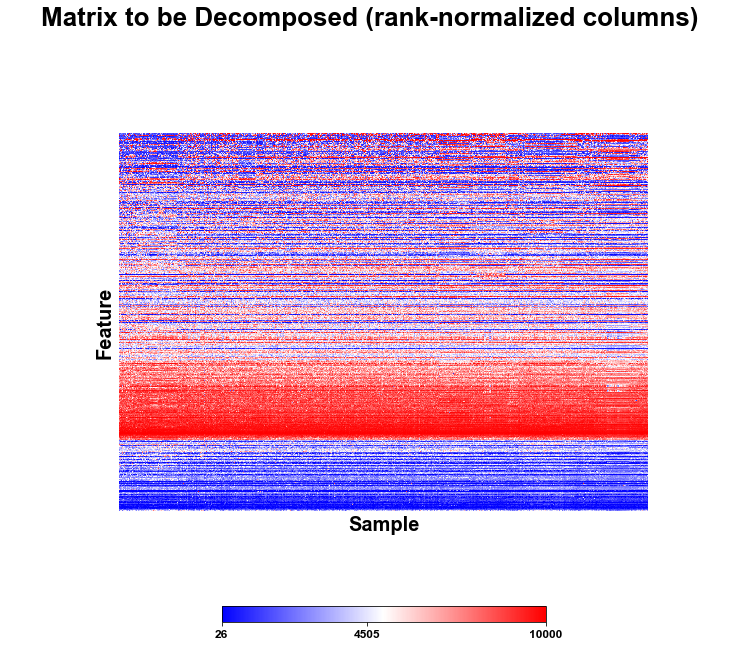

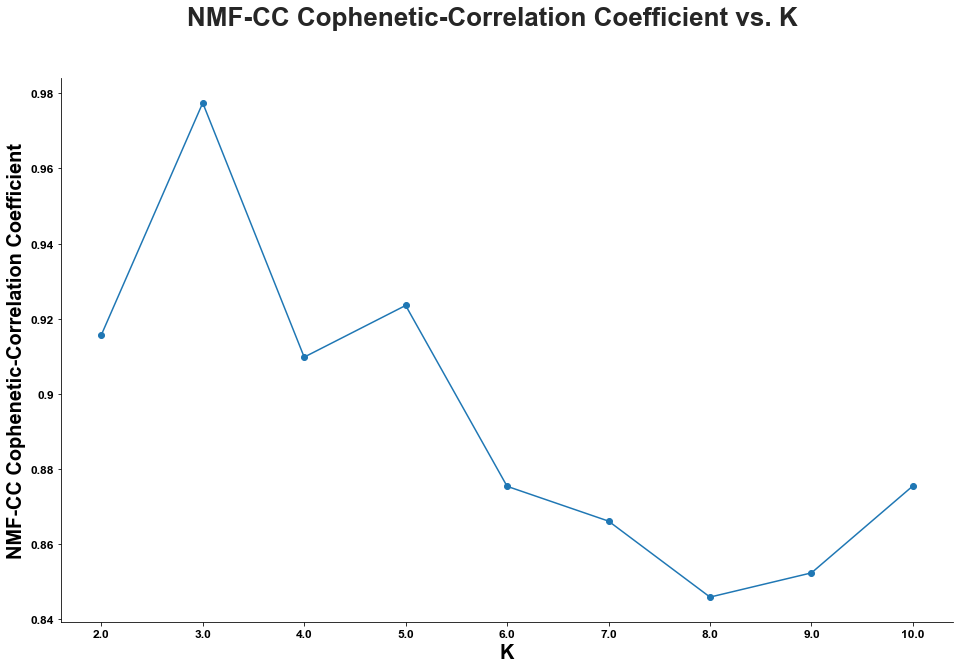

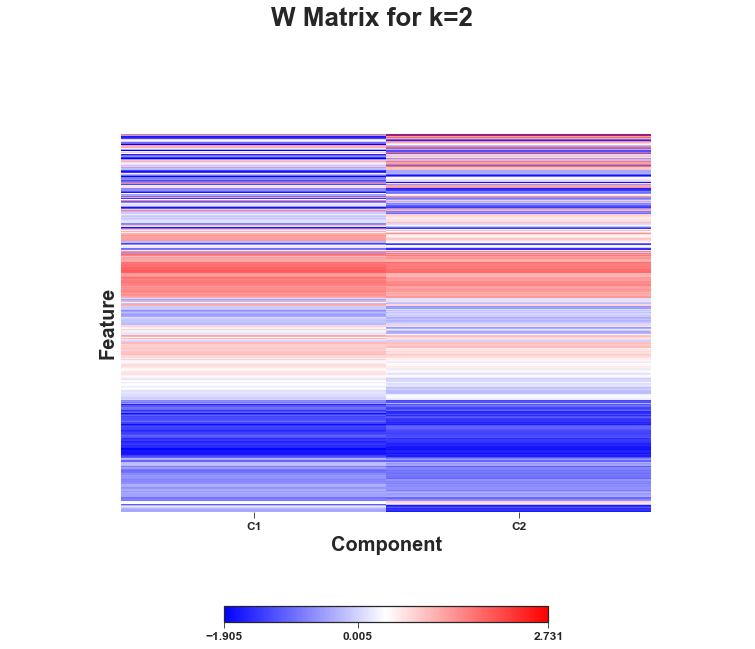

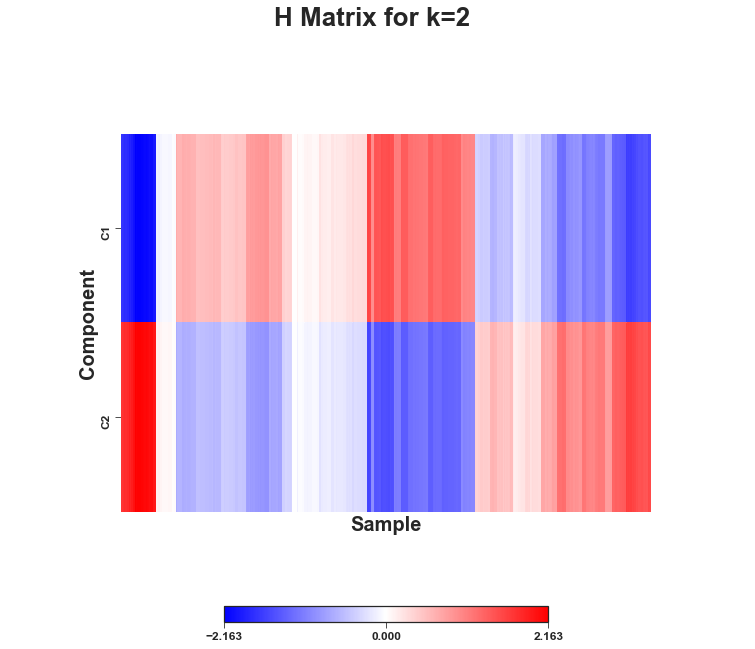

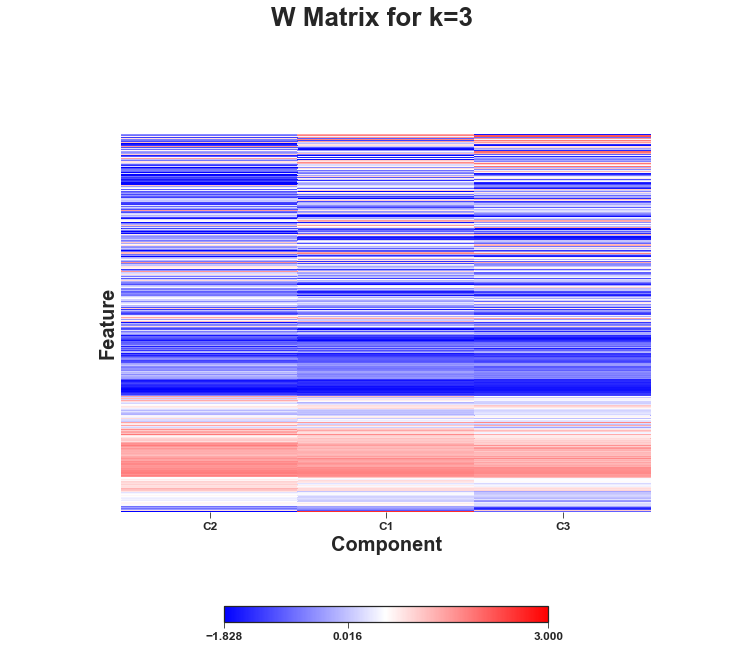

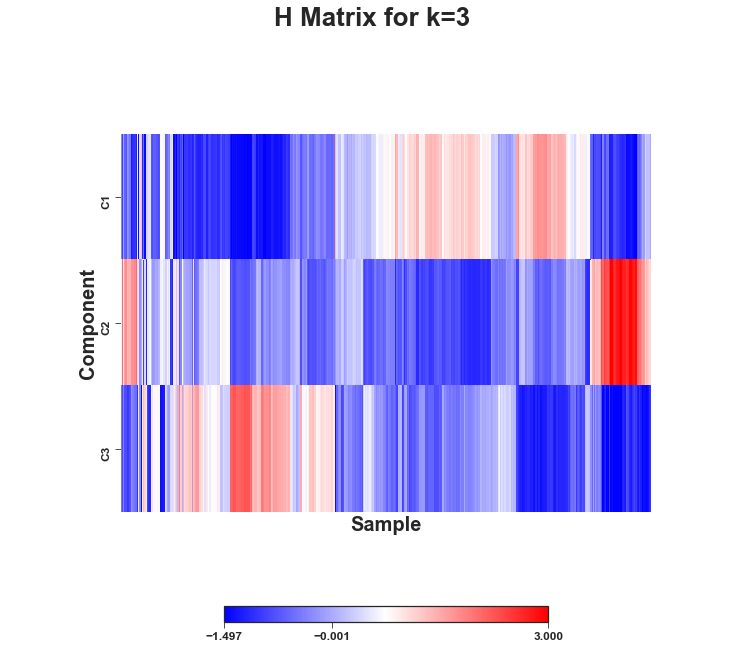

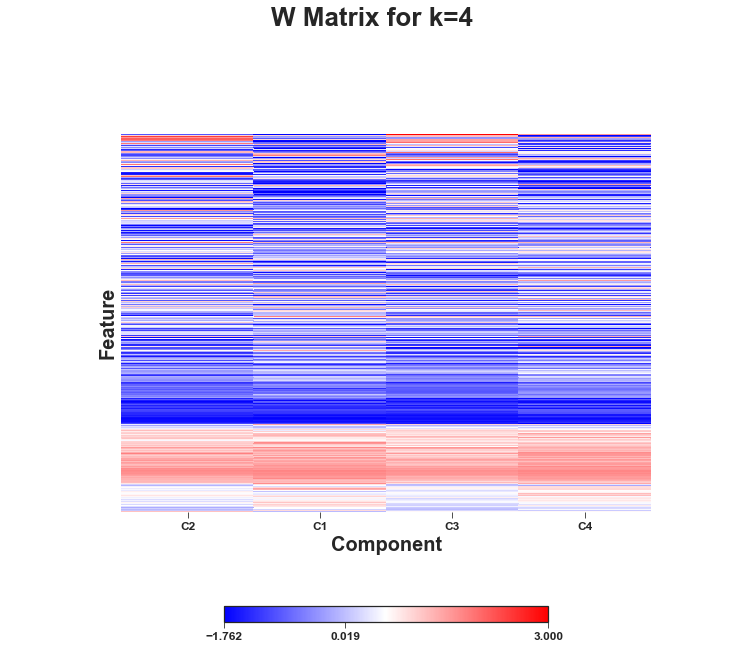

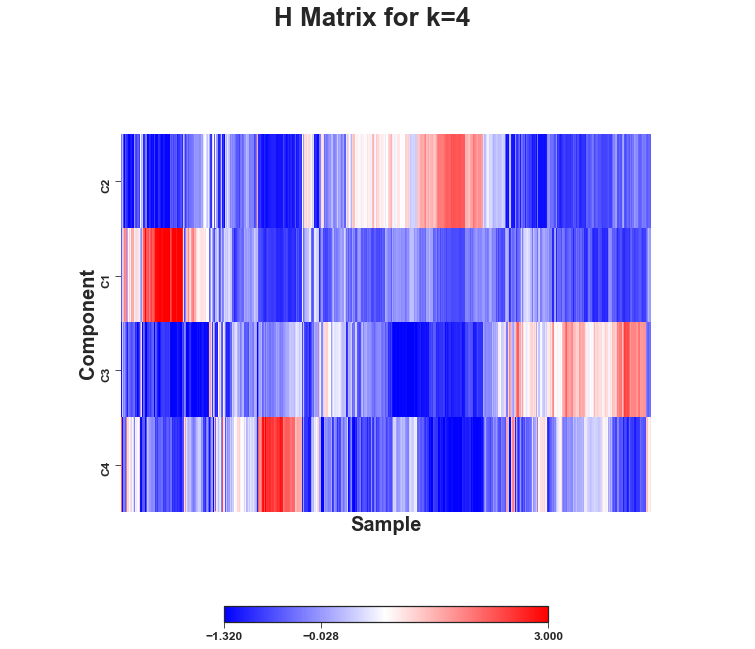

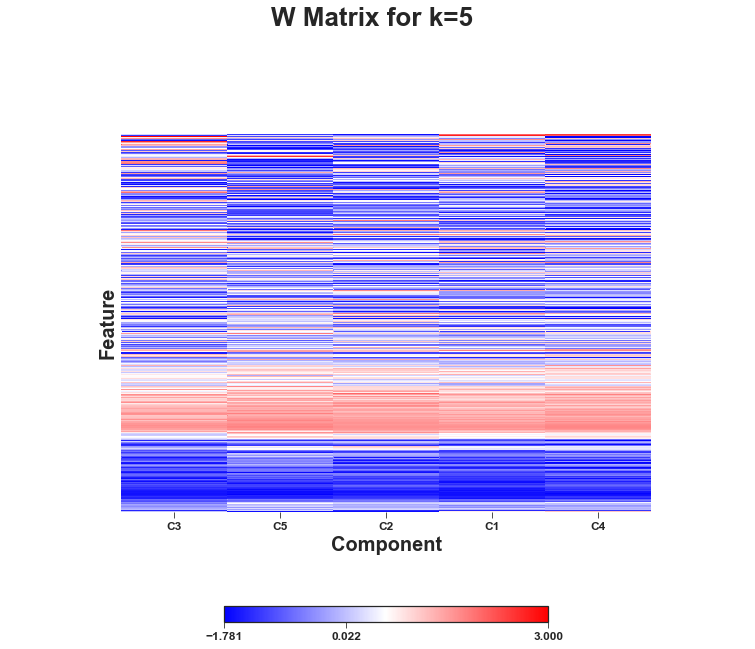

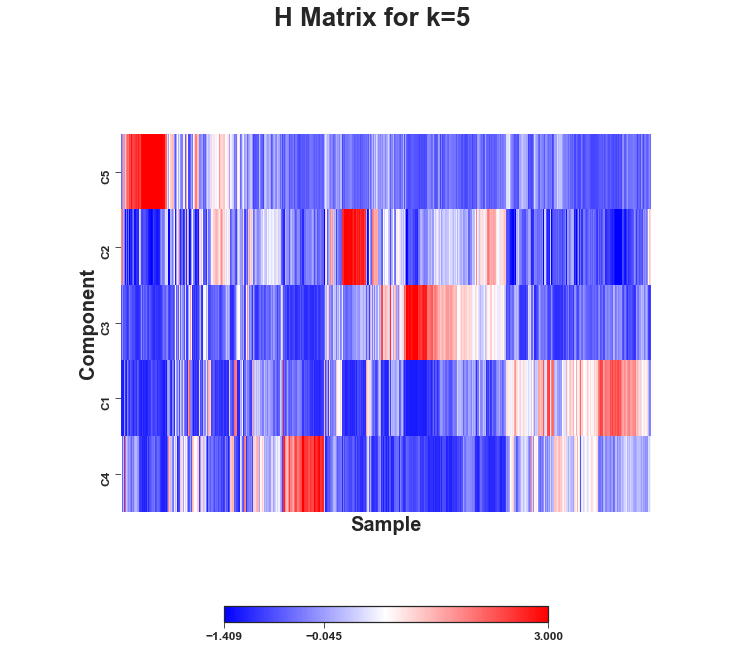

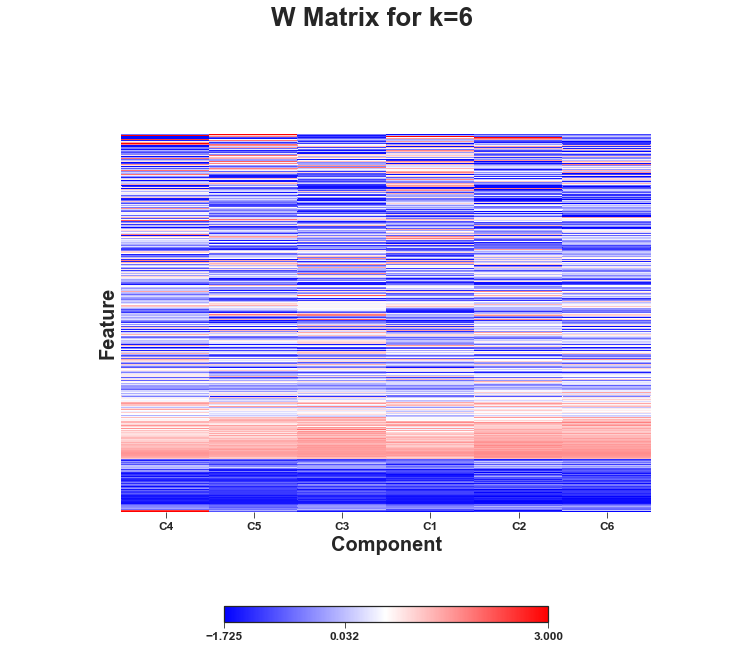

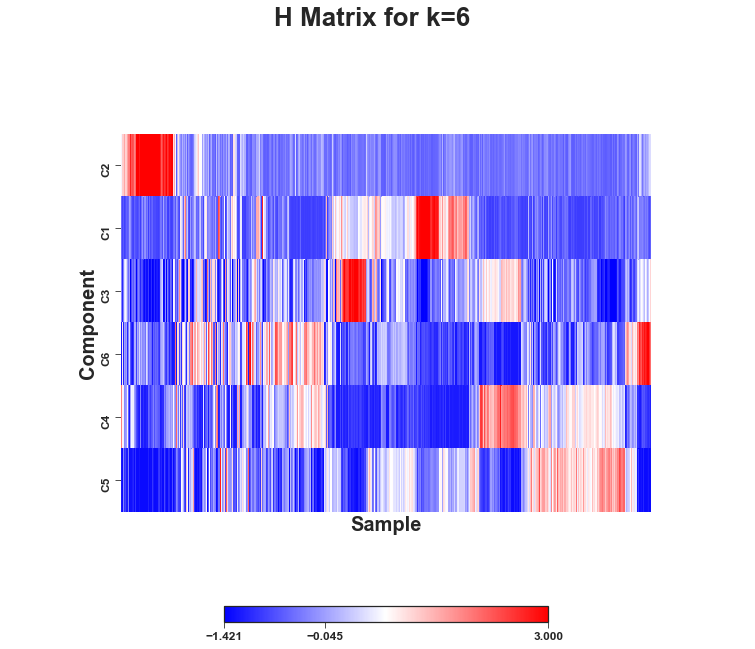

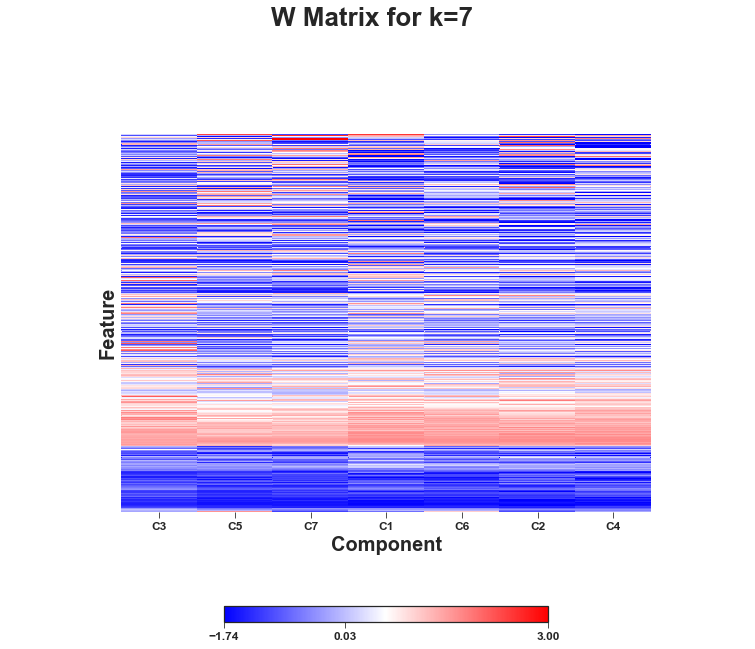

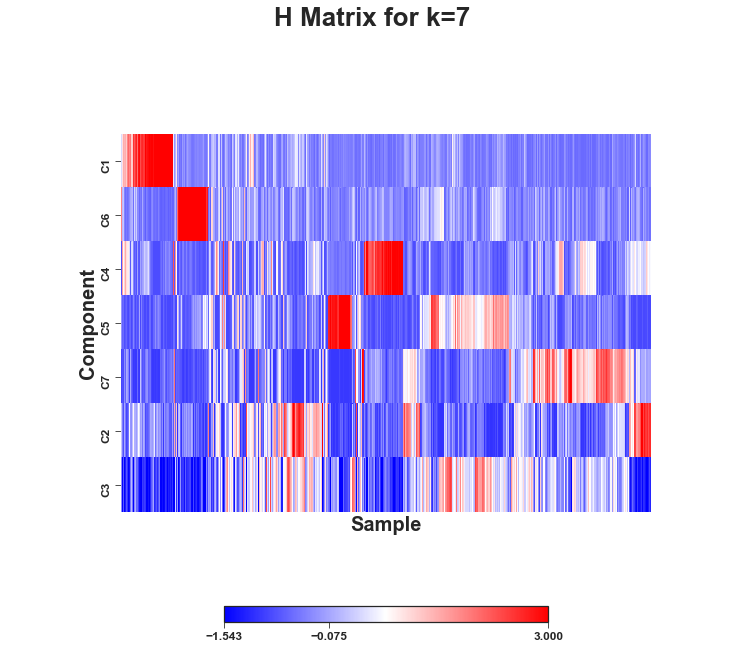

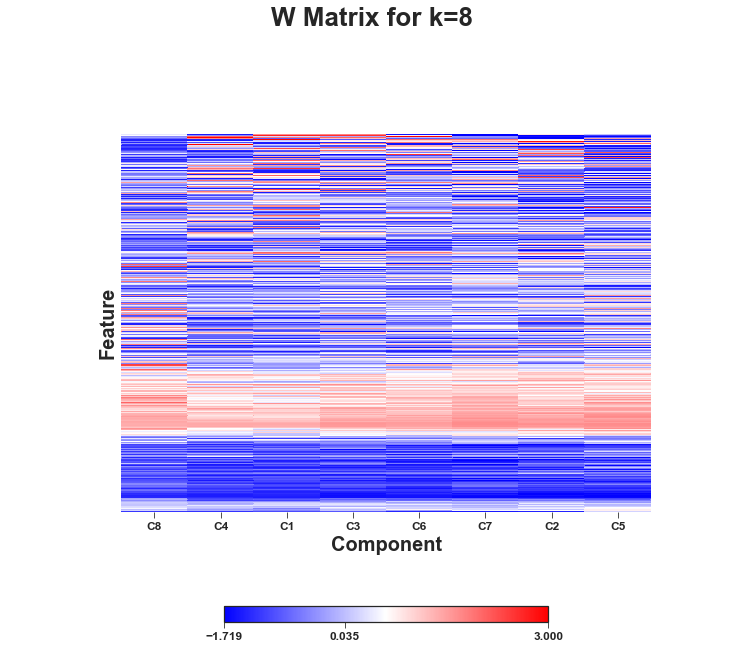

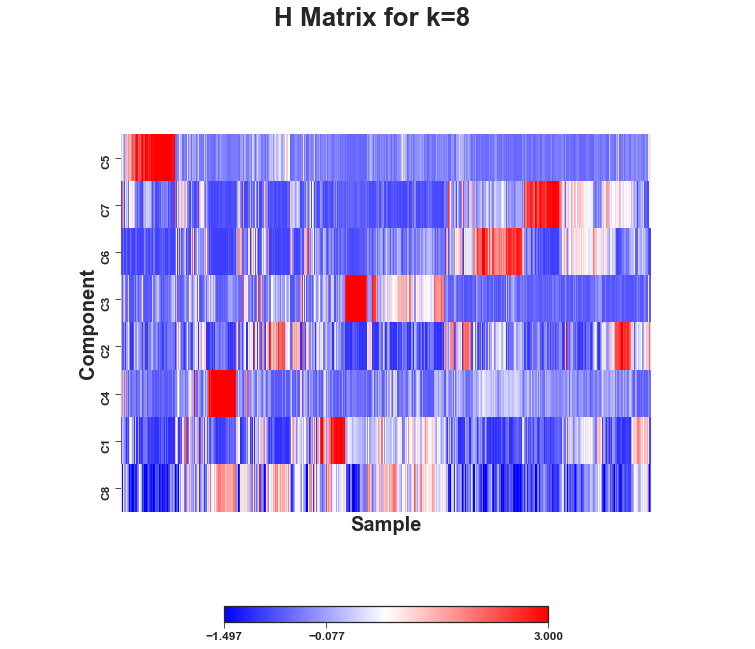

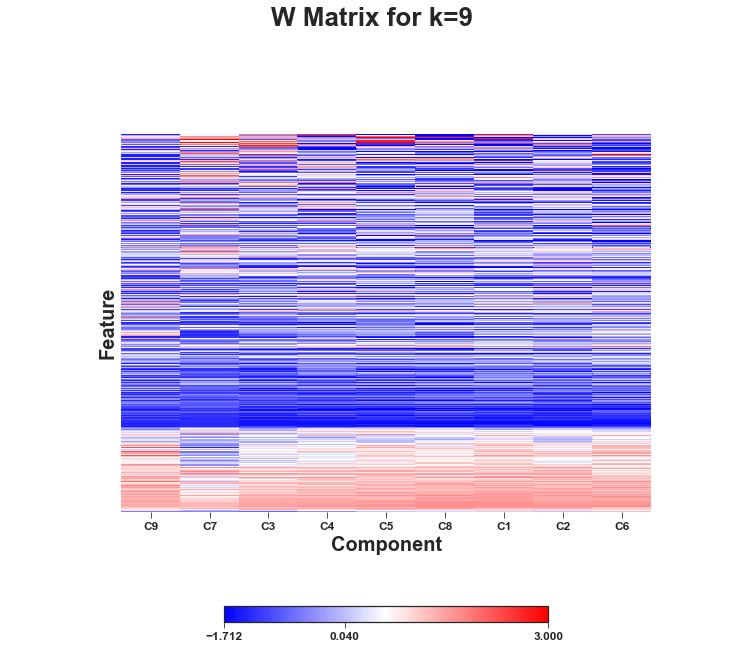

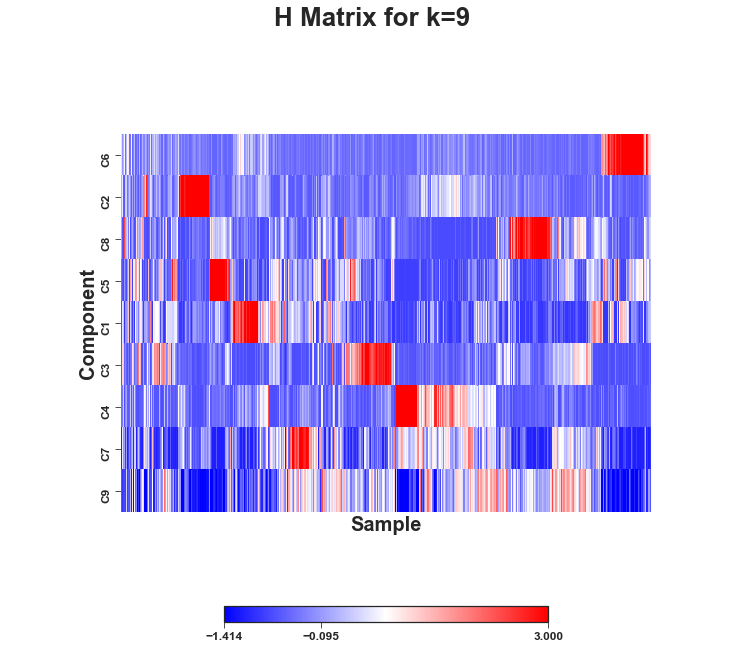

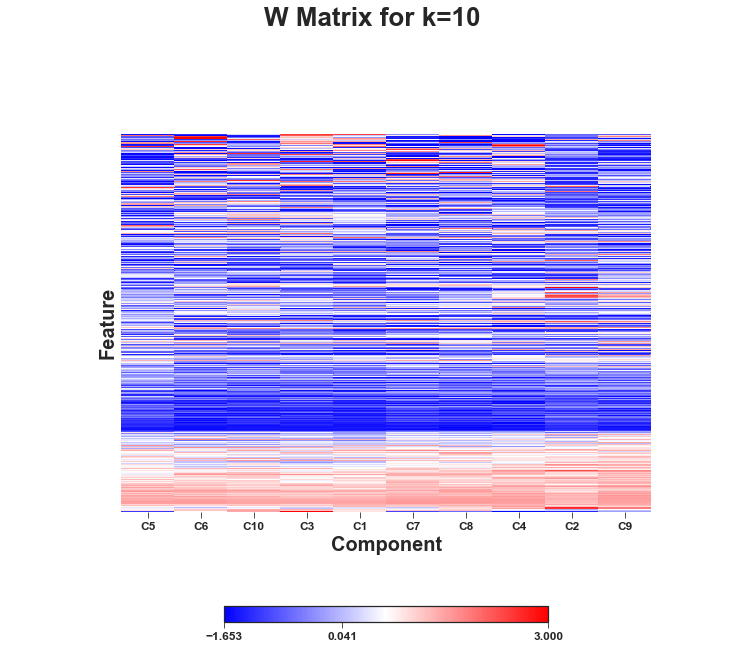

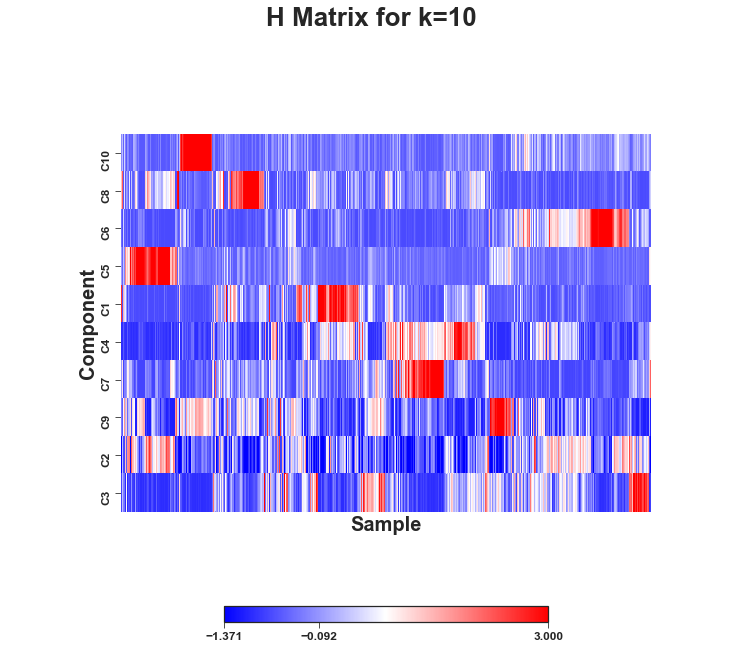

In [9]:
nmf_results_dn, cophenetic_correlation_coefficients_dn = ccal.oncogps.define_components(matrix = reference_dataset_plati_genes, 
                                                                                                                                 ks = range(2, 11),  
                                                                                                                                 n_clusterings = 30, 
                                                                                                                                 random_seed = 6137,  
                                                                                                                                 directory_path = '../output')

In [ ]:
nmf_results_dn, cophenetic_correlation_coefficients_dn = ccal.oncogps.define_components(matrix = reference_dataset_plati_genes, 
                                                                                                                                 ks = range(2, 11),  
                                                                                                                                 n_clusterings = 30, 
                                                                                                                                 random_seed = 6137,  
                                                                                                                                 directory_path = '../media')

### 5. Choose optimal decomposition (k=7) and define NMF components

Looking at the results of the prior computation we can see that there is an optimal solution for k= 7 components. The code below reads the $W$ and $H$ matrices corresponding to 7 components.

In [11]:
w_matrix = ccal.read_gct('../output/nmf_cc/nmf/nmf_k7_w.gct')

In [12]:
h_matrix = ccal.read_gct('../output/nmf_cc/nmf/nmf_k7_h.gct')

Plot the W and H matrices for k=7 components

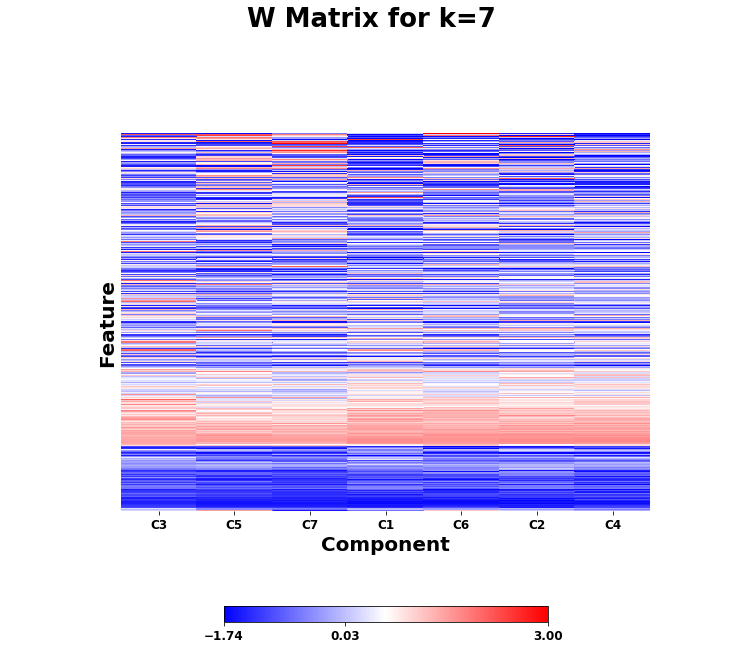

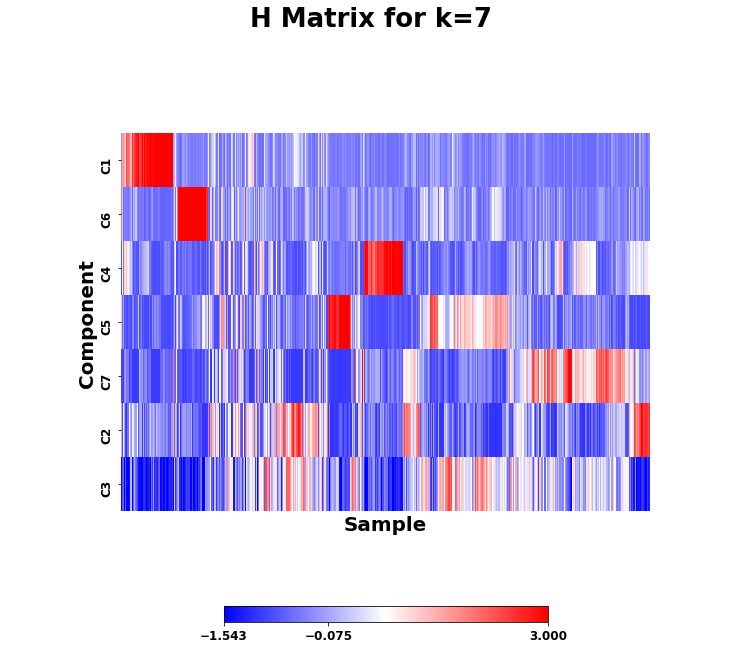

In [13]:
ccal.oncogps.plot_nmf(w_matrix=w_matrix, h_matrix=h_matrix)

### 6. Compare the NMF components with each other using the information coefficient
This computation generates an association matrix that compares the component profiles against each other using the Information Coefficient. This is figure S6A in the article and shows that the components are distinct.

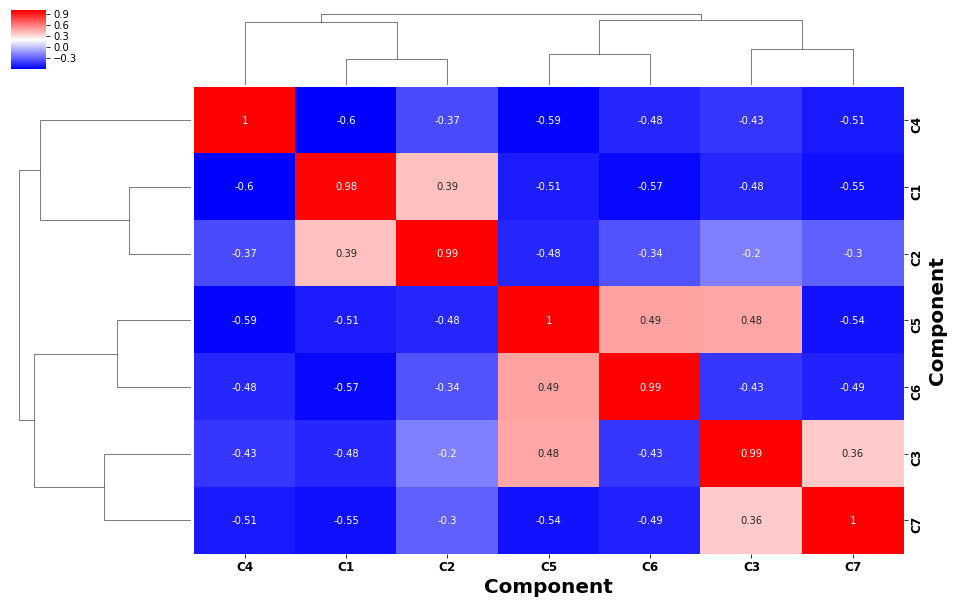

In [35]:
CM = ccal.association.make_comparison_panel(matrix1 = h_matrix, 
                                                                                      matrix2 = h_matrix, axis=1, 
                                                                                      matrix1_label='Component', 
                                                                                      matrix2_label='Component')